## Gnar Automobiles
Gnar Automobiles engages in the distribution and sale of automobiles and light commercial vehicles. The owner of the Gnar Automobiles deals with a number of distributors across countries in different origins.


#### Problem Statement
As every origin sends cars with various specifications. The owner wants to determine the origin of the cars based on the specifications of the cars to further
increase business opportunities.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [2]:
data=pd.read_csv('auto-mpg.csv')

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
data.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,NaN


In [5]:
miss=pd.DataFrame({'Col_name':data.columns,'Missing value?':
                   [any(data[x].isnull()) for x in data.columns],
                   'Count_':[sum(data[y].isnull()) for y in data.columns],
                   'Percentage':[sum(data[y].isnull())/data.shape[0] for y in data.columns]})
miss.sort_values(by='Count_',ascending=False)

,Col_name,Missing value?,Count_,Percentage
3,horsepower,True,6,0.015075
0,mpg,False,0,0.000000
1,cylinders,False,0,0.000000
2,displacement,False,0,0.000000
4,weight,False,0,0.000000
5,acceleration,False,0,0.000000
6,model year,False,0,0.000000
7,origin,False,0,0.000000
8,car name,False,0,0.000000


In [6]:
print('Total Missing values: %s'%sum(miss.Count_))

Total Missing values: 6


In [7]:
data.horsepower=data.horsepower.fillna(data.horsepower.mean())

In [8]:
miss=pd.DataFrame({'Col_name':data.columns,'Missing value?':
                   [any(data[x].isnull()) for x in data.columns],
                   'Count_':[sum(data[y].isnull()) for y in data.columns],
                   'Percentage':[sum(data[y].isnull())/data.shape[0] for y in data.columns]})
miss.sort_values(by='Count_',ascending=False)

,Col_name,Missing value?,Count_,Percentage
0,mpg,False,0,0.0
1,cylinders,False,0,0.0
2,displacement,False,0,0.0
3,horsepower,False,0,0.0
4,weight,False,0,0.0
5,acceleration,False,0,0.0
6,model year,False,0,0.0
7,origin,False,0,0.0
8,car name,False,0,0.0


#### Scale the data using MinMaxScaler and plot the boxplot before and after scaling the data.

In [9]:
feat=data.columns
feat=feat.drop(['car name', 'origin'])

In [10]:
X=data.drop(['car name', 'origin'],axis=1)
y=data.origin

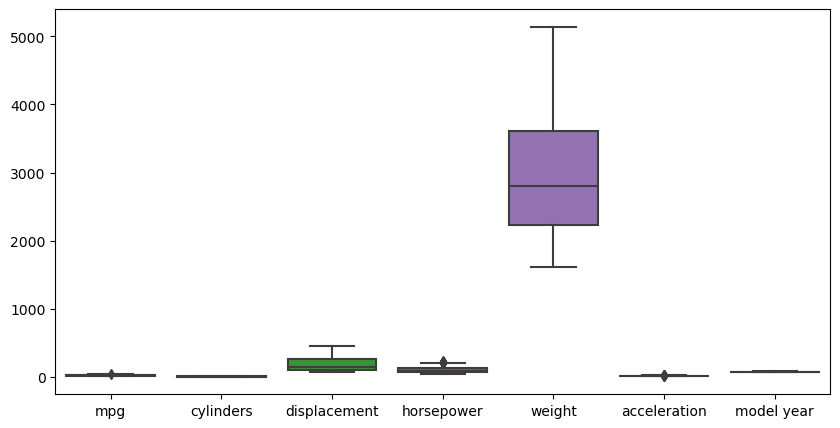

In [12]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.boxplot(data=X)
plt.xticks(ticks=np.arange(len(feat)),labels=feat)
plt.show()

####  The data is highly imbalanced. Using MinMaxScaler to scale the data.

In [13]:
scl=MinMaxScaler()
X=scl.fit_transform(X)

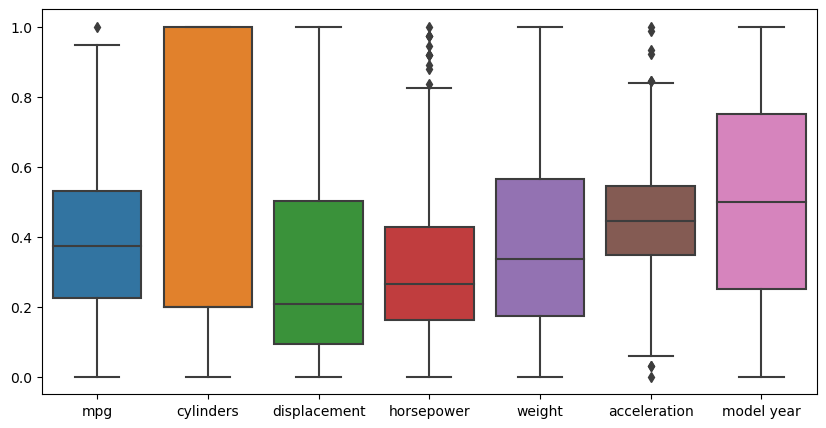

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=X)
plt.xticks(ticks=np.arange(len(feat)),labels=feat)
plt.show()

###### Explore the data relations with target variable origin

In [15]:
Target_ratio=y.value_counts()/len(y)
print(Target_ratio)

origin
1    0.625628
3    0.198492
2    0.175879
Name: count, dtype: float64


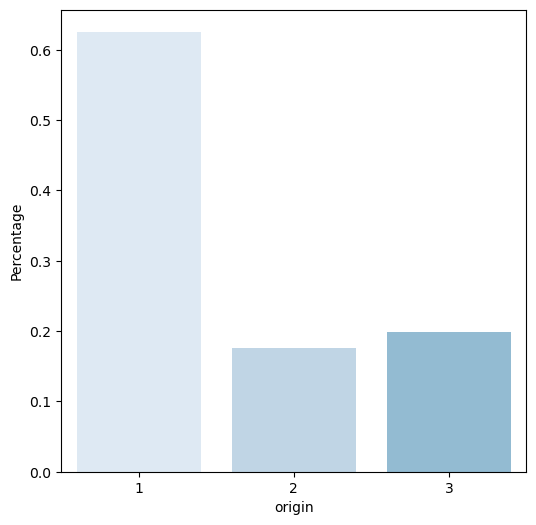

In [17]:
## Checking for data unbalance
plt.figure(figsize = (6,6))
sns.set_palette(sns.color_palette("Blues"))
sns.barplot(x=Target_ratio.index, y=Target_ratio)
plt.ylabel('Percentage')
plt.show()

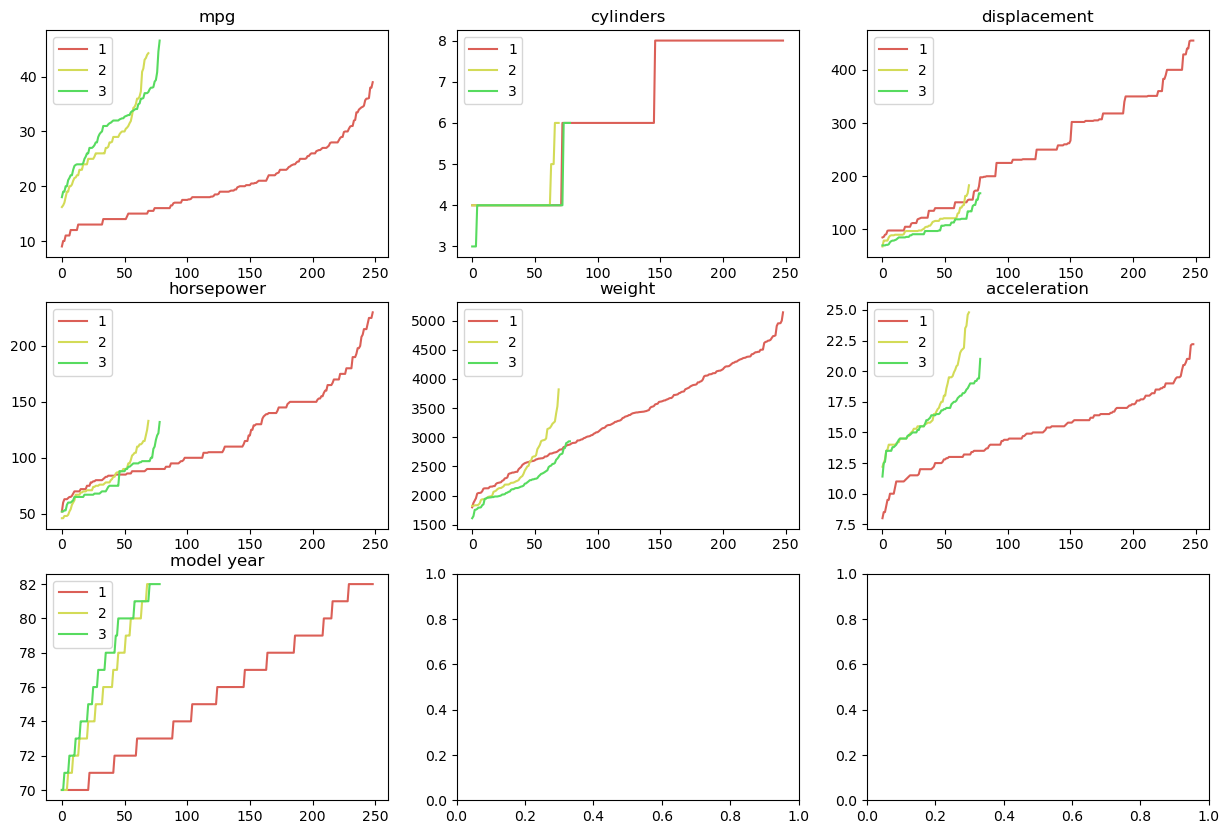

In [18]:
sns.set_palette(sns.color_palette('hls'))
fig,ax=plt.subplots(3,3,figsize=(15,10))
col=data.columns
q=0
for i in ax:
    for j in i:
        for grp,tata in data.groupby('origin'):
            j.set_title(col[q])
            j.plot(sorted(tata[col[q]]))
            j.legend(np.arange(3)+1)
        if q==6:
            break
        q+=1

From the above data we can see that origin 1 has high stats for every feature while origin 3 and 2 have pretty low stats.

### KNN model with k=3,9,12

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0, test_size=0.3)

In [21]:
knn9=KNeighborsClassifier(n_neighbors=9)
knn12=KNeighborsClassifier(n_neighbors=12)
knn3=KNeighborsClassifier(n_neighbors=3)

knn3.fit(X_train,y_train)
knn12.fit(X_train,y_train)
knn9.fit(X_train,y_train)

knn3_pred=knn3.predict(X_test)
knn12_pred=knn12.predict(X_test)
knn9_pred=knn9.predict(X_test)

### Evaluate the models and find the accuracy.

In [22]:
print('Accuracy score when k=3:',accuracy_score(y_test,knn3_pred)*100)
print('Accuracy score when k=9:',accuracy_score(y_test,knn9_pred)*100)
print('Accuracy score when k=12:',accuracy_score(y_test,knn12_pred)*100)

Accuracy score when k=3: 70.0
Accuracy score when k=9: 77.5
Accuracy score when k=12: 71.66666666666667


### Plot the visualizations for the models

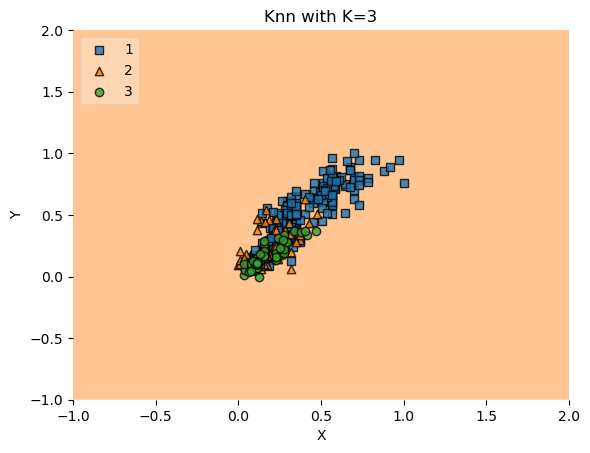

In [23]:
value=4
width=4
plot_decision_regions(np.array(X), np.array(y), clf=knn3, legend=2,feature_index=[3,4],
                      filler_feature_values={6: value, 1:value,2:value,5:value,0:value},
                      filler_feature_ranges={6: width, 1: width,2: width,5: width,0: width})

# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K='+ str(3))
plt.show()

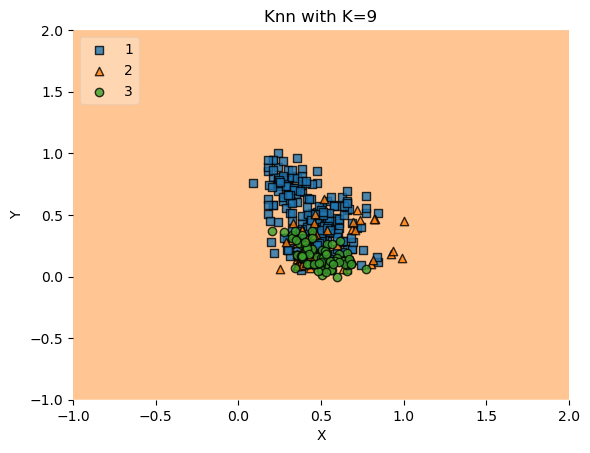

In [24]:
value=4
width=4
plot_decision_regions(np.array(X), np.array(y), clf=knn9, legend=2,feature_index=[5,4],
                      filler_feature_values={6: value, 1:value,2:value,3:value,0:value},
                      filler_feature_ranges={6: width, 1: width,2: width,3: width,0: width})

# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K='+ str(9))
plt.show()

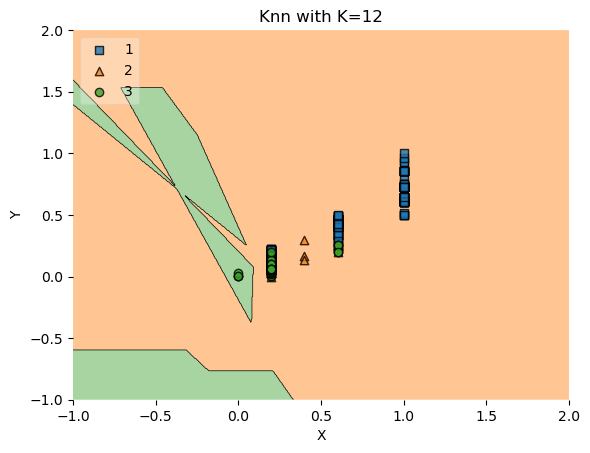

In [25]:
value=4
width=4
plot_decision_regions(np.array(X), np.array(y), clf=knn12, legend=2,feature_index=[1,2],
                      filler_feature_values={6: value, 3:value,4:value,5:value,0:value},
                      filler_feature_ranges={6: width, 3: width,4: width,5: width,0: width})

# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K='+ str(12))
plt.show()